# Pokemon Type Classification

We are going to use Neural Networks, specifically a Multilayered Perceptron, to train a model into classifying a pokemon's Type based on its Base Stats.

### Base Stats
* HP
* Attack
* Defense
* Special Attack
* Special Defense
* Speed

### Types
* Normal
* Fire
* Water
* Electric
* Grass
* Ice
* Fighting
* Poison
* Ground
* Flying
* Psychic
* Bug
* Rock
* Ghost
* Dragon
* Dark
* Steel
* Fairy

### Goal
Determine the types of new pokemon using Neural Networks classifier:

| Pokemon | HP | Atk | Def | Sp. Atk | Sp. Def | Speed | Type   |
|---------|----|-----|-----|---------|---------|-------|--------|
| Necrozma| ...| ... | ... |  ...    |  ...    |  ...  | ???    |

## Step 1: Importing dataset  into a Pandas dataframe

In [1]:
import pandas as pd
import matplotlib as plt

data = pd.read_csv('pokemon.csv')
data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.50,1.00,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.50,2.00,2.00,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


#### The stats dictating the primary type (type1) are stored in d1

In [2]:
d1 = data[['hp','attack','defense','sp_attack','sp_defense','speed', 'type1']]
d1

,hp,attack,defense,sp_attack,sp_defense,speed,type1
0,45,49,49,65,65,45,grass
1,60,62,63,80,80,60,grass
2,80,100,123,122,120,80,grass
3,39,52,43,60,50,65,fire
4,58,64,58,80,65,80,fire
5,78,104,78,159,115,100,fire
6,44,48,65,50,64,43,water
7,59,63,80,65,80,58,water
8,79,103,120,135,115,78,water
9,45,30,35,20,20,45,bug


#### The stats dictating secondary type (type 2) are stored in d2  
null values are dropped

In [3]:
d2 = data[['hp','attack','defense','sp_attack','sp_defense','speed', 'type2']]
d2 = d2.dropna()
d2

,hp,attack,defense,sp_attack,sp_defense,speed,type2
0,45,49,49,65,65,45,poison
1,60,62,63,80,80,60,poison
2,80,100,123,122,120,80,poison
5,78,104,78,159,115,100,flying
11,60,45,50,90,80,70,flying
12,40,35,30,20,20,50,poison
13,45,25,50,25,25,35,poison
14,65,150,40,15,80,145,poison
15,40,45,40,35,35,56,flying
16,63,60,55,50,50,71,flying


#### Both d1 and d2 are merged into mergeData  
Primary and secondary types of each pokemon are treated as separate rows.  
These means two rows can have the same stats but lead to different type outputs if they belong to the same pokemon

In [4]:
d1 = d1.rename(columns={'type1': 'type'})
d2 = d2.rename(columns={'type2': 'type'})
mergeData = pd.concat([d1, d2], ignore_index=True)
mergeData

,hp,attack,defense,sp_attack,sp_defense,speed,type
0,45,49,49,65,65,45,grass
1,60,62,63,80,80,60,grass
2,80,100,123,122,120,80,grass
3,39,52,43,60,50,65,fire
4,58,64,58,80,65,80,fire
5,78,104,78,159,115,100,fire
6,44,48,65,50,64,43,water
7,59,63,80,65,80,58,water
8,79,103,120,135,115,78,water
9,45,30,35,20,20,45,bug


## Step 2: Preparing testing and training data

The training set and testing set will base its values from the 6 base stats alone. Only these columns will be extracted from the data into the training/testing set.  

The stat distribution is acquired from the base stats by dividing each stat by the sum of the other stats.  
This way:
$$ \sum_{s \in \text{stats}} s = 1$$


In [5]:
x = mergeData[['hp','attack','defense','sp_attack','sp_defense','speed']]

# normalize stats to get distribution such that all stats add up to 1
x = x.div(x.sum(axis=1), axis=0)
x

,hp,attack,defense,sp_attack,sp_defense,speed
0,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509
1,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148
2,0.128000,0.160000,0.196800,0.195200,0.192000,0.128000
3,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356
4,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531
5,0.123028,0.164038,0.123028,0.250789,0.181388,0.157729
6,0.140127,0.152866,0.207006,0.159236,0.203822,0.136943
7,0.145679,0.155556,0.197531,0.160494,0.197531,0.143210
8,0.125397,0.163492,0.190476,0.214286,0.182540,0.123810
9,0.230769,0.153846,0.179487,0.102564,0.102564,0.230769


#### The pokemon types (in data y) will serve as class labels for training and testing

In [6]:
y = mergeData['type']
y

0          grass
1          grass
2          grass
3           fire
4           fire
5           fire
6          water
7          water
8          water
9            bug
10           bug
11           bug
12           bug
13           bug
14           bug
15        normal
16        normal
17        normal
18        normal
19        normal
20        normal
21        normal
22        poison
23        poison
24      electric
25      electric
26        ground
27        ground
28        poison
29        poison
          ...   
1188        fire
1189    fighting
1190    fighting
1191     psychic
1192       water
1193       water
1194      ground
1195      ground
1196      flying
1197      dragon
1198       steel
1199       fairy
1200     psychic
1201      dragon
1202       grass
1203    fighting
1204    fighting
1205       fairy
1206       fairy
1207       fairy
1208       fairy
1209       steel
1210       ghost
1211      poison
1212    fighting
1213    fighting
1214      flying
1215       ste

### We will use Scikit's <code>train_test_split()</code> method to split our data set into training set and test set automatically

The following parameters:
* <code>train_size</code>
* <code>test_size</code>  
will be set accordingly such that data will be set into 70% training and 30% testing

In [7]:
from sklearn.model_selection import train_test_split

# 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, stratify=y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### The final preparation step is normalizing the data.
MLP works best if the data is scaled in terms of [0,1] or [-1,1] ranges, so we will use Scikit's MinMaxScaler to scale the data accordingly.  
We will normalize it to the scale of [-1,1] to prepare it for Tanh activation.

In [8]:
from sklearn.preprocessing import MinMaxScaler

#TANH activation
scaler = MinMaxScaler(feature_range=(-1,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


## Step 3: Training

We will be using Scikit's MLPClassifier function.  
Some of the parameters are:
* <code>hidden_layer_sizes(a,b,c...)</code>: A total of 4 hidden layers are used with node numbers narrowing down by powers of 2. This increases the Perceptron's ability to handle complex non-linear data
* <code>activation</code>:  The 'tanh' function is used for activation as it's better suited for complex classifications
* <code>max_iter</code>: an integer value representing the maximum number of training iterations; our training will iterate at most 10 000 times
* <code>learning_rate_init</code>: a double value representing the learning rate to be used, a constant miniscule value of 0.001 is used.

In [9]:
from sklearn.neural_network import MLPClassifier

activation='tanh'
mlp = MLPClassifier(hidden_layer_sizes=(16, 8, 4, 2),max_iter=10000,learning_rate_init=0.001,activation=activation)
mlp.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 8, 4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

We use two hidden layers, since there are six input variables and the classes (types) have some overlap.

## Step 4: Testing
We will be using the predict function to make predictions from the training data.  
We will compare these predictions with the testing data using Scikit's <code>confusion_matrix</code> and <code>classification_report</code> 

In [10]:
predictions = mlp.predict(x_test)

The confusion matrix below shows that many inputs are wrongly classified as either the NORMAL or WATER types.

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print (confusion_matrix(y_test,predictions))

[[ 0  0  0  0  0  0  0  5  0  0  1  0  4  0  2  3  2  6]
 [ 0  0  0  0  0  0  0  1  0  0  1  0  5  0  1  0  1  6]
 [ 0  0  0  0  0  2  0  0  0  0  2  0  0  0  3  0  1  5]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  1  0  5  1  0  1]
 [ 0  0  0  0  0  1  0  3  0  0  0  0  1  0  6  0  1  2]
 [ 0  0  0  0  0  6  0  1  0  0  0  0  4  0  1  1  0  3]
 [ 0  0  0  0  0  1  0  3  0  0  0  0  8  0  5  0  1  2]
 [ 0  0  0  0  0  1  0  4  0  0  0  0 17  0  3  1  0  4]
 [ 0  0  0  0  0  0  0  1  0  0  1  0  4  0  0  1  2  3]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  5  0  6  3  0 12]
 [ 0  0  0  0  0  3  0  0  0  0  2  0  6  0  1  1  2  5]
 [ 0  0  0  0  0  2  0  1  0  0  0  0  1  0  2  1  1  3]
 [ 0  0  0  0  0  0  0  3  0  0  1  0 24  0  1  0  0  4]
 [ 0  0  0  0  0  1  0  0  0  0  0  0 13  0  3  0  0  3]
 [ 0  0  0  0  0  2  0  3  0  0  0  0  4  0  8  0  0  8]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  3  0  2  5  3  3]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  0  3  5  2  2]
 [ 0  0  0  0  0  0  0  2  0  0

The classification report below shows substantial recall percentages for the WATER and NORMAL types although most of them are False Positive guesses.

ROCK and FIGHTING types though show relatively high precision/recall despite having relatively low type distribution

In [12]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

         bug       0.00      0.00      0.00        23
        dark       0.00      0.00      0.00        15
      dragon       0.00      0.00      0.00        13
    electric       0.00      0.00      0.00        14
       fairy       0.00      0.00      0.00        14
    fighting       0.29      0.38      0.32        16
        fire       0.00      0.00      0.00        20
      flying       0.11      0.13      0.12        30
       ghost       0.00      0.00      0.00        12
       grass       0.00      0.00      0.00        29
      ground       0.22      0.10      0.14        20
         ice       0.00      0.00      0.00        11
      normal       0.22      0.73      0.34        33
      poison       0.00      0.00      0.00        20
     psychic       0.14      0.32      0.19        25
        rock       0.21      0.28      0.24        18
       steel       0.12      0.14      0.13        14
       water       0.23    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Step 4: Analysis

#### Type Distribution  
The percentage distribution of each type for the whole population are displayed below:

water       0.107553
normal      0.089491
grass       0.080460
flying      0.080460
psychic     0.067323
bug         0.063218
ground      0.054187
poison      0.054187
fire        0.053366
rock        0.048440
fighting    0.043514
dark        0.041051
electric    0.039409
fairy       0.038588
steel       0.037767
dragon      0.036125
ghost       0.033662
ice         0.031199
Name: type, dtype: float64


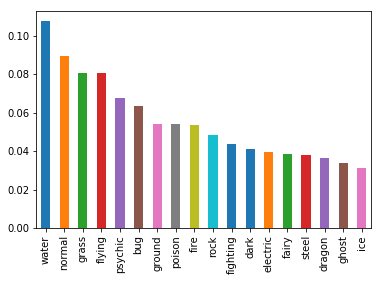

In [16]:
type_dist = y.value_counts(normalize=True, sort=True)
print(type_dist)
type_dist.plot(kind='bar')

#### F1 scores 
Classification report is serialized into a dictionary, and f1 scores of each pokemon type are referenced via a type list

In [14]:
c_r = classification_report(y_test,predictions,output_dict=True)
type_list = type_dist.index
f1 = []
for i in type_list:
    f1.append(c_r[i]['f1-score'])

f1 = pd.Series(data=f1, index=type_list)
f1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


water       0.318182
normal      0.340426
grass       0.000000
flying      0.121212
psychic     0.192771
bug         0.000000
ground      0.137931
poison      0.000000
fire        0.000000
rock        0.238095
fighting    0.324324
dark        0.000000
electric    0.000000
fairy       0.000000
steel       0.129032
dragon      0.000000
ghost       0.000000
ice         0.000000
dtype: float64

#### Percent difference from random guessing  
We plot the difference between the F1 scores and frequencies of each type, to see the amount of improvement the model has over random guessing.  
Results are sorted in descending order

fighting    0.280810
normal      0.250935
water       0.210628
rock        0.189655
psychic     0.125448
steel       0.091265
ground      0.083744
flying      0.040752
ice        -0.031199
ghost      -0.033662
dragon     -0.036125
fairy      -0.038588
electric   -0.039409
dark       -0.041051
fire       -0.053366
poison     -0.054187
bug        -0.063218
grass      -0.080460
dtype: float64

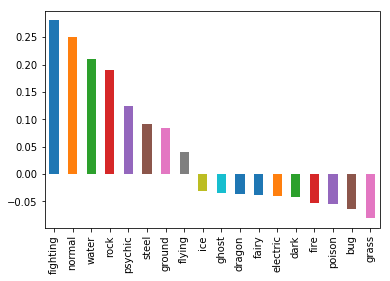

In [15]:
delta = [(f - t) for t, f in zip(type_dist, f1)]
an = pd.Series(data=delta, index=type_list)
an.sort_values(ascending=False, inplace=True)
an.plot(kind='bar')
an

<p>A few types have large improvements over their frequencies, but it is a small number of types (8 out of 17). From the confusion matrix, we also see that there are many false positives for a few types as well.</p>
<p>From looking at the actual dataset, there are several pokemon of different types which have exactly the same base stats. Because of this, it becomes impossible to accurately classify all pokemon from their base stats alone.</p>

## Conclusion  
* Attempting to classify pokemon types from their base stats alone is ineffective and unreliable.  
* Reaching more than 50% accuracy on any type is infeasible, as type variations are common in many pokemon sharing the similar base stats.  
* Trained models will tend to guess many false positives on the types with the high frequency distribution. (e.g. Water and Normal)
* Trained models are more sensitive to type stereotypes like Rock (Defense), Psychic(Sp. Atk) and Steel(Defense).

# Individual Contributions
* Jandel Cancio - Extracted the data and trained the model
* Joseph Hernandez - Tested the model and analyzed the results